In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv(
    r"C:\Users\user\Documents\Traffic_prediction\dataset\dataset\household_power_consumption.txt",
    sep=';',
    na_values='?',      
    low_memory=False
)

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')


In [5]:
df = df.sort_values('DateTime')

In [6]:
# convert num to float
numeric_cols = df.columns.drop(['Date', 'Time', 'DateTime'])
df[numeric_cols] = df[numeric_cols].astype(float)


In [7]:
print(df.isna().sum())

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
DateTime                     0
dtype: int64


In [8]:
df = df.interpolate(method='linear')

C:\Users\user\AppData\Local\Temp\ipykernel_1740\2145716054.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear')


In [9]:
df['NextDay_Global_active_power'] = df['Global_active_power'].shift(-1440)

In [10]:
df = df.dropna(subset=['NextDay_Global_active_power'])

In [11]:
X = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]
y = df['NextDay_Global_active_power']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Regression

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred = model.predict(X_test)

In [15]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [16]:
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 0.9626
R² Score: -0.2056


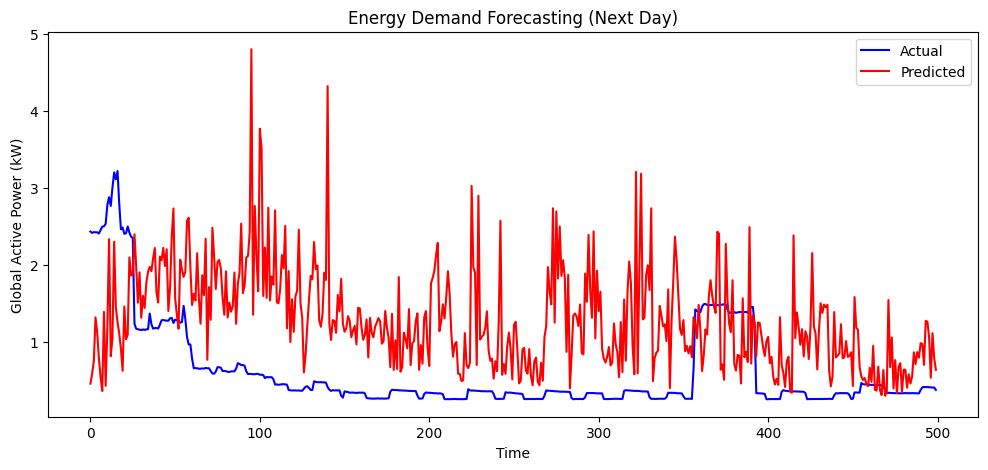

In [17]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:500], label='Actual', color='blue')
plt.plot(y_pred[:500], label='Predicted', color='red')
plt.title('Energy Demand Forecasting (Next Day)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.show()

In [18]:
import joblib
joblib.dump(model, "model/energy_consumption.pkl")
print(" Energy Forecasting next day Best Model Save")

 Energy Forecasting next day Best Model Save
